<a href="https://colab.research.google.com/github/Ananya2003Gupta/MLDLS22/blob/main/Asg02%2603_MLDLS22_Task2_Multiclass.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**KMeans Clustering Algorithm**

#**Multiclass Classification**

#**Drug Classification**

#Importing or Uploading the Dataset

In [2]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving drug_classification.csv to drug_classification.csv
User uploaded file "drug_classification.csv" with length 6029 bytes


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Importing Libraries

In [4]:
#importing the libraries
import pandas as pd 
import numpy as np 
import  seaborn as sns
import matplotlib.pyplot as plt

#Reading the Dataset
Here, dataset is a csv file

In [5]:
#loading the dataset
df= pd.read_csv('drug_classification.csv')

#Analysing the Dataset

In [6]:
print(df)

     Age Sex      BP Cholesterol  Na_to_K   Drug
0     23   F    HIGH        HIGH   25.355  DrugY
1     47   M     LOW        HIGH   13.093  drugC
2     47   M     LOW        HIGH   10.114  drugC
3     28   F  NORMAL        HIGH    7.798  drugX
4     61   F     LOW        HIGH   18.043  DrugY
..   ...  ..     ...         ...      ...    ...
195   56   F     LOW        HIGH   11.567  drugC
196   16   M     LOW        HIGH   12.006  drugC
197   52   M  NORMAL        HIGH    9.894  drugX
198   23   M  NORMAL      NORMAL   14.020  drugX
199   40   F     LOW      NORMAL   11.349  drugX

[200 rows x 6 columns]


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [8]:
df.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [9]:
df.dtypes

Age              int64
Sex             object
BP              object
Cholesterol     object
Na_to_K        float64
Drug            object
dtype: object

In [10]:
print(df.head())

   Age Sex      BP Cholesterol  Na_to_K   Drug
0   23   F    HIGH        HIGH   25.355  DrugY
1   47   M     LOW        HIGH   13.093  drugC
2   47   M     LOW        HIGH   10.114  drugC
3   28   F  NORMAL        HIGH    7.798  drugX
4   61   F     LOW        HIGH   18.043  DrugY


In [11]:
print(df.tail())

     Age Sex      BP Cholesterol  Na_to_K   Drug
195   56   F     LOW        HIGH   11.567  drugC
196   16   M     LOW        HIGH   12.006  drugC
197   52   M  NORMAL        HIGH    9.894  drugX
198   23   M  NORMAL      NORMAL   14.020  drugX
199   40   F     LOW      NORMAL   11.349  drugX


#Cleaning the Dataset

In [12]:
df=df.drop('Drug',axis=1)

In [14]:
df['Cholesterol'].replace('HIGH',1,inplace=True)
df['Cholesterol'].replace('NORMAL',0,inplace=True)
df['Cholesterol'].replace('LOW',-1,inplace=True)

In [13]:
df['BP'].replace('HIGH',1,inplace=True)
df['BP'].replace('NORMAL',0,inplace=True)
df['BP'].replace('LOW',-1,inplace=True)

#Allocating values

In [15]:
X= df.iloc[:,4].values
Y= df.iloc[:,2].values
df= df.iloc[:,[2,4]].values

#Plotting the Graph of Age vs Interest

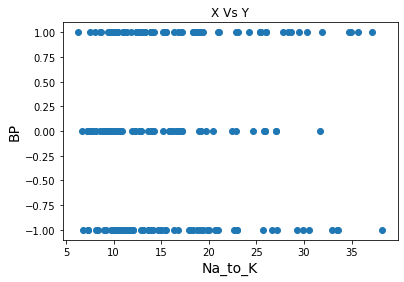

In [16]:
plt.scatter(X, Y)
plt.title('X Vs Y')
plt.xlabel('Na_to_K', fontsize=14)
plt.ylabel('BP', fontsize=14)
plt.show()

#The Elbow Method

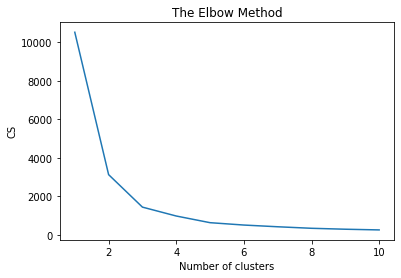

In [17]:
from sklearn.cluster import KMeans
cs = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(df)
    cs.append(kmeans.inertia_)
plt.plot(range(1, 11), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()

#Kmeans Class definition
Source:https://gist.github.com/ImadDabbura/6e2230b33373991aa3ccdbff6ebb3fd7#file-kmeans-py

In [18]:
import numpy as np
from numpy.linalg import norm


class Kmeans:
    '''Implementing Kmeans algorithm.'''

    def __init__(self, n_clusters, max_iter=100, random_state=123):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.random_state = random_state

    def initializ_centroids(self, X):
        np.random.RandomState(self.random_state)
        random_idx = np.random.permutation(X.shape[0])
        centroids = X[random_idx[:self.n_clusters]]
        return centroids

    def compute_centroids(self, X, labels):
        centroids = np.zeros((self.n_clusters, X.shape[1]))
        for k in range(self.n_clusters):
            centroids[k, :] = np.mean(X[labels == k, :], axis=0)
        return centroids

    def compute_distance(self, X, centroids):
        distance = np.zeros((X.shape[0], self.n_clusters))
        for k in range(self.n_clusters):
            row_norm = norm(X - centroids[k, :], axis=1)
            distance[:, k] = np.square(row_norm)
        return distance

    def find_closest_cluster(self, distance):
        return np.argmin(distance, axis=1)

    def compute_sse(self, X, labels, centroids):
        distance = np.zeros(X.shape[0])
        for k in range(self.n_clusters):
            distance[labels == k] = norm(X[labels == k] - centroids[k], axis=1)
        return np.sum(np.square(distance))
    
    def fit(self, X):
        self.centroids = self.initializ_centroids(X)
        for i in range(self.max_iter):
            old_centroids = self.centroids
            distance = self.compute_distance(X, old_centroids)
            self.labels = self.find_closest_cluster(distance)
            self.centroids = self.compute_centroids(X, self.labels)
            if np.all(old_centroids == self.centroids):
                break
        self.error = self.compute_sse(X, self.labels, self.centroids)
    
    def predict(self, X):
        distance = self.compute_distance(X, self.centroids)
        return self.find_closest_cluster(distance)

#Kmeans Clustering Using Kmeans function of sklearn library

In [19]:
kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(df)
# checking how many of the samples were correctly labeled
labels = kmeans.labels_
"""correct_labels = sum(Y == labels)
print("Result: %d out of %d samples were correctly labeled." % (correct_labels, Y.size))
print('Accuracy score: {0:0.2f}'. format(correct_labels/float(Y.size)))"""

'correct_labels = sum(Y == labels)\nprint("Result: %d out of %d samples were correctly labeled." % (correct_labels, Y.size))\nprint(\'Accuracy score: {0:0.2f}\'. format(correct_labels/float(Y.size)))'

In [20]:
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(df)
# checking how many of the samples were correctly labeled
labels = kmeans.labels_
"""correct_labels = sum(Y == labels)
print("Result: %d out of %d samples were correctly labeled." % (correct_labels, Y.size))
print('Accuracy score: {0:0.2f}'. format(correct_labels/float(Y.size)))"""

'correct_labels = sum(Y == labels)\nprint("Result: %d out of %d samples were correctly labeled." % (correct_labels, Y.size))\nprint(\'Accuracy score: {0:0.2f}\'. format(correct_labels/float(Y.size)))'

#Plot of Clusters formed by Kmeans Clustering Algorithm

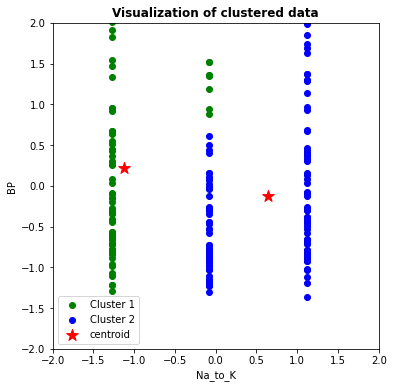

In [29]:
from sklearn.preprocessing import StandardScaler
x_std = StandardScaler().fit_transform(df)

kmeans = Kmeans(n_clusters=2, max_iter=100)
kmeans.fit(x_std)
centroids = kmeans.centroids

# Plotting the clustered data
fig, ax = plt.subplots(figsize=(6,6))
plt.scatter(x_std[kmeans.labels == 0, 0], x_std[kmeans.labels == 0, 1],
            c='green', label='Cluster 1')
plt.scatter(x_std[kmeans.labels == 1, 0], x_std[kmeans.labels == 1, 1],
            c='blue', label='Cluster 2')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=150,
            c='r', label='centroid')
plt.legend()
plt.xlim([-2, 2])
plt.ylim([-2, 2])
plt.xlabel('Na_to_K')
plt.ylabel('BP')
plt.title('Visualization of clustered data', fontweight='bold')
ax.set_aspect('equal');